In [1]:
import re
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [5]:
df.duplicated().sum()

122

In [6]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']"


In [7]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
3794,3042.0,Plot area 338(282.61 sq.m.)
1546,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet area: 1249.65 sq.ft. (116.1 sq.m.)
2636,1415.0,Super Built up area 1351(125.51 sq.m.)
2405,4235.0,Plot area 5605(520.72 sq.m.)Built Up area: 5200 sq.ft. (483.1 sq.m.)Carpet area: 4235 sq.ft. (393.44 sq.m.)
3630,2185.0,Super Built up area 2185(202.99 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)


In [8]:
# 1. area with type

In [9]:
df[['price','area','areaWithType']].sample(5)

,price,area,areaWithType
881,1.10,958.0,Super Built up area 89
2733,11.75,2844.0,Plot area 316(264.22 sq.m.)
1906,0.26,576.0,Super Built up area 576(53.51 sq.m.)
1679,2.75,3587.0,Built Up area: 3000 (278.71 sq.m.)
2499,2.25,1650.0,Super Built up area 1650(153.29 sq.m.)


In [10]:
# can convert to lower so that alphabet mismatch wont happen

In [11]:
#this fn extracts the super built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None


In [12]:
# this fn will extract the built up area or carpet area
def get_built_up_or_carpet_area(text,area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [13]:
# this fn checks if provided area in sq m and convert it to sqft
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sq_m_value = float(match.group(1))
        return round(sq_m_value*10.7639,2) # conversion factor for sq.m. to sqft
    return area_value


In [14]:
# extract super built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis=1)

In [15]:
# extract built up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_built_up_or_carpet_area(x,'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['built_up_area']),axis=1)

In [16]:
# extract carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_built_up_or_carpet_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['carpet_area']),axis=1)

In [17]:
df[['price','property_type','areaWithType','area','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,areaWithType,area,super_built_up_area,built_up_area,carpet_area
522,1.20,flat,Carpet area: 77.53,835.0,NaN,NaN,77.53
2753,2.62,flat,Super Built up area 3150(292.64 sq.m.),3150.0,3150.0,NaN,NaN
3262,1.30,flat,Super Built up area 1647(153.01 sq.m.),1647.0,1647.0,NaN,NaN
1598,2.30,house,Plot area 150(125.42 sq.m.),1350.0,NaN,NaN,NaN
2964,1.00,flat,Super Built up area 1740(161.65 sq.m.),1740.0,1740.0,NaN,NaN


In [18]:
df.duplicated().sum()

122

In [19]:
df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())][['price','property_type','areaWithType','area','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,areaWithType,area,super_built_up_area,built_up_area,carpet_area
2054,1.50,flat,Super Built up area 2560(237.83 sq.m.)Built Up area: 2017 sq.ft. (187.39 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2560.0,2560.0,2017.0,1800.0
3280,0.32,flat,Super Built up area 687(63.82 sq.m.)Built Up area: 601 sq.ft. (55.83 sq.m.)Carpet area: 448 sq.ft. (41.62 sq.m.),687.0,687.0,601.0,448.0
65,0.25,flat,Super Built up area 500(46.45 sq.m.)Built Up area: 430 sq.ft. (39.95 sq.m.)Carpet area: 410 sq.ft. (38.09 sq.m.),500.0,500.0,430.0,410.0
2126,1.37,flat,Super Built up area 1500(139.35 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),1500.0,1500.0,1450.0,1400.0
3657,3.40,flat,Super Built up area 3400(315.87 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),3400.0,3400.0,3000.0,2800.0


In [20]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','areaWithType','area','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [21]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2684,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN
568,2.75,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
1252,17.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
1064,1.15,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
2667,22.00,house,8250.0,Plot area 1000(836.13 sq.m.),NaN,NaN,NaN


In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [23]:
all_null_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [24]:
all_null_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [25]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [26]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)',area_with_type)
    return float(match.group(1)) if match else None

In [27]:
all_null_df['built_up_area'] = all_null_df['areaWithType'].apply(extract_plot_area)

In [28]:
all_null_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
28,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,50.00,NaN
29,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
31,4.40,house,2880.0,Plot area 320(267.56 sq.m.),NaN,320.00,NaN
38,NaN,house,NaN,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
40,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN


In [29]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area'])==9.0:
            return row['built_up_area']*9
        elif round(row['area']/row['built_up_area'])==11.0:
            return row['built_up_area']* 10.7
        else:
            return row['built_up_area']

In [30]:
all_null_df['built_up_area'] = all_null_df.apply(convert_scale,axis=1)

In [31]:
all_null_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.20,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
19,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
25,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
26,7.00,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN
28,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,450.00,NaN
29,5.65,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
31,4.40,house,2880.0,Plot area 320(267.56 sq.m.),NaN,2880.00,NaN
38,NaN,house,NaN,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
40,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN


In [32]:
#update the original data
df.update(all_null_df)

In [33]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM'

In [35]:
# 2. additional room

In [36]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [37]:
#additional room
#list of new cols to be created 
new_cols = ['study room', 'servant room','store room','pooja room','others']

# create new cols based on the additional room column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [38]:
df.sample(5)[['additionalRoom','study room', 'servant room','store room','pooja room','others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2539,"study room,pooja room,store room",1,0,1,1,0
954,"study room,pooja room",1,0,0,1,0
2098,"servant room,store room",0,1,1,0,0
2376,others,0,0,0,0,1
709,not available,0,0,0,0,0


In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0,0,0,0,0,0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal'

In [40]:
# 3. agePossession 

In [41]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
By 2025                  4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
By 2027                  2
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Jun 2027                 2
Jul 2027                 2
Mar 2025                 2
Oct 2025      

In [42]:
df['agePossession'].shape

(3803,)

In [43]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [44]:
df['agePossession'].apply(categorize_age_possession).shape

(3803,)

In [45]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [46]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [48]:
df.shape

(3803, 25)

In [49]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
2052,flat,signature global park,sohna road,0.54,6506.0,830.0,Carpet area: 830 (77.11 sq.m.),2,2,1,not available,2.0,NaN,Relatively New,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']",[],"['Lift(s)', 'Swimming Pool', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,830.0,0,0,0,0,0
2664,house,independent,sector 40,2.10,23333.0,900.0,Plot area 900(83.61 sq.m.),3,3,2,others,3.0,North,Moderately Old,"['Huda city centre metro station', 'Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Dispencery', 'Shivam Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Naval Mendiratta', 'Centre For Sight Gurgaon Sector 29', 'Sukhmani Hospital Pvt. Ltd', 'Ahmed Hospital Multi Speciality', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'Pernod Ricard Charitable Dispensary', 'IBP Petrol Pump', 'Bharat petroleum', 'Hdfc bank', 'Raj Restaurant', 'Fast food', 'Fast Food', 'Om Sweets', 'Bar and restaurant', 'Cafe Coffee Day', '32nd Milestone', 'Darbar', 'PWO house', 'Dhabba', 'St. Angels Jr', 'School of Inspired Leadership SOIL', 'CR Model Public School', 'Manav Rachna School', 'St. Angels Sr', 'Amity Global School', 'Salvan Public School', 'Stones2milestones', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '7 Geyser', '14 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,900.0,NaN,0,0,0,0,1
3086,flat,godrej frontier,sector 80,1.60,7000.0,2286.0,Super Built up area 2262(210.15 sq.m.),3,3,3,servant room,5.0,NaN,Moderately Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash Hospital', 'Shri Rade Clinic', 'Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Petrol Pump Indian Oil', 'Rao Dhaba', ""McDonald's"", ""McDonald's""]",[],"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting', 'Water softening plant']",2262.0,NaN,NaN,0,1,0,0,0
937,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),4,5,3,not available,2.0,North-East,Moderately Old,"['Dwarka sector 21 metro station', 'Pacific D21 Mall', 'Dharampeth Main Road', 'Dwarka Expressway', 'The Shikshiyan School', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi International Airport', 'Gurgaon railway station', 'The Executive Centre', 'Luxus Haritma Resort', ""Oyster's Water Park"", 'BSF Golf Course']",[],"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,6228.0,NaN,0,0,0,0,0
1386,flat,samadhan shri kamal cghs,sector 1,2.01,11426.0,1759.0,Carpet area: 1760 (163.51 sq.m.),4,4,3+,not available,10.0,NaN,Moderately Old,"['HUDA Sector 23 Market', 'Palam Vihar Vyapar kendra', 

In [50]:
# 4. furnishdetails

In [54]:

df[['furnishDetails','features']].sample(5)

,furnishDetails,features
3109,NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3504,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1432,NaN,NaN
2399,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Waste Disposal', 'Rain Water Harvesting']"
700,NaN,NaN


In [55]:
# extract all unique furnishings from the furnishDetails column
all_furnishing = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[','').replace(']','').replace("'","").split(', ')
    all_furnishing.extend(furnishings)
unique_furnishings = list(set(all_furnishing))

In [56]:
# define a fn to extract the count of a furnishing from the furnishdetails
def get_furnishing_count(details,furnishing):
    if isinstance(details,str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [57]:
# Simplify the furnishings list by removing "No" prefix and numbers
cols_to_include = [re.sub(r'No |\d+','',furnishing).strip() for furnishing in unique_furnishings]
cols_to_include = list(set(cols_to_include)) # get unique furnishings
cols_to_include = [furnishing for furnishing in cols_to_include if furnishing] # removes empty string

# create new cols for each unique furnishing and populate with counts
for furnishing in cols_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x,furnishing))

# create the new df with the required cols
furnishings_df = df[['furnishDetails'] + cols_to_include]

In [58]:
furnishings_df.shape

(3803, 19)

In [59]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\deporwal\AppData\Local\Temp\ipykernel_3776\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [60]:
furnishings_df.sample(5)

,Fridge,TV,Chimney,Bed,Fan,Modular Kitchen,Sofa,Washing Machine,Geyser,Light,Wardrobe,Curtains,Microwave,Stove,AC,Dining Table,Water Purifier,Exhaust Fan
1335,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0
521,0,0,0,0,0,1,0,0,0,10,1,0,0,0,0,0,0,1
728,1,1,0,3,3,0,1,0,1,9,2,1,0,1,1,0,0,0
3421,0,0,1,0,4,1,1,1,2,10,4,1,0,1,0,0,1,1
2874,0,0,0,0,6,0,0,0,2,6,4,0,0,0,0,0,0,0


In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [62]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-package

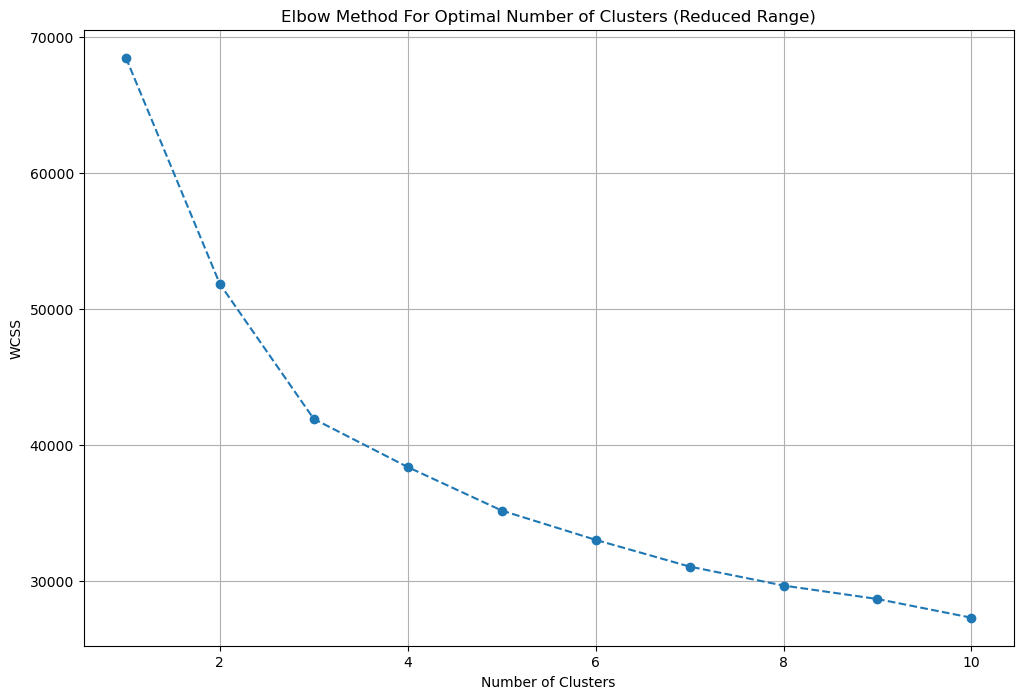

In [63]:
# bplot the result
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [64]:
n_clusters=3

# fit the kmeans model
kmeans = KMeans(n_clusters=n_clusters,random_state=1)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
df = df.iloc[:,:-18]

In [66]:
# 0-- unfurnished 1-- semi furnished 2--- furnished
df['furnishing_type'] = clusters

In [67]:
df[['furnishDetails','furnishing_type']].sample(5)

,furnishDetails,furnishing_type
1420,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
142,"['5 Fan', '1 Exhaust Fan', '2 Geyser', '17 Light', '1 Chimney', '1 Modular Kitchen', '1 Curtains', '4 AC', '4 Bed', '1 Sofa', '1 Microwave', 'No Dining Table', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
3626,[],0
83,"['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '16 Light', '8 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
887,NaN,0


In [ ]:
# here we can take the no. of amentities as an additional feature

In [ ]:
# len(df['furnishDetails'][0].split(','))

In [ ]:
# 5. Features

In [79]:
df[['society','features']].sample(5)

,society,features
788,ansal sushant lok ci,"['Water Storage', 'Park']"
3244,pareena mi casa,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
2693,NaN,NaN
1679,independent,NaN
3588,international city by sobha phase 1,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']"


In [80]:
df['features'].isnull().sum()

635

In [81]:
app_df = pd.read_csv('appartments.csv')
app_df.sample(5)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
140,Mapsko The Icon 79,"4 BHK Apartment in Sector 79, Gurgaon","['NH 48', 'Sapphire 83 Mall', 'Narayana e-Techno School - Manesar', 'Garhi Harsaru Junction', 'Miracles Apollo Cradle Hospital']","{'NH 48': '4.6 KM', 'Sapphire 83 Mall': '6 KM', 'Narayana e-Techno School - Manesar': '5.8 KM', 'Garhi Harsaru Junction': '11.8 KM', 'Miracles Apollo Cradle Hospital': '5.5 KM', 'DPG Degree College': '11.8 KM', 'Indira Gandhi Intl Airport': '31.2 KM', 'Savoy Suites, Manesar': '6.2 KM', 'Golden Greens Golf & Resorts': '11.4 KM', 'Nakhrola Stadium': '5.8 KM', 'De Adventure Park': '11.1 KM', 'DLF Corporate Greens': '8.4 KM'}",https://www.99acres.com/mapsko-the-icon-79-sector-79-gurgaon-npxid-r408246,"{'4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '3,500 sq.ft.', 'price-range': '₹ 2.99 Cr'}}","['Mini Theatre', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Business Lounge', 'Spa', 'Steam Room', 'Squash Court', 'Cafeteria', 'Billiards']"
29,M3M Soulitude,"2, 3 BHK Independent Floor in Sector 89, Gurgaon","['Sector 86 Road', 'Genesis Hospital', 'Dwarka Expy', 'Euro International School', 'Vatika Town Square-INXT']","{'Sector 86 Road': '950 Meter', 'Genesis Hospital': '1.5 KM', 'Dwarka Expy': '2.5 KM', 'Euro International School': '2.6 KM', 'Vatika Town Square-INXT': '4.1 KM', 'Garhi Harsaru Junction': '4.6 KM', 'Delh-Ajmer Expy': '5.8 KM', 'Gurugram University': '15.7 KM', 'Indira Gandhi Intl Airport': '28 KM'}",https://www.99acres.com/m3m-soulitude-sector-89-gurgaon-npxid-r378131,"{'2 BHK': {'building_type': 'Independent Floor', 'area_type': 'Carpet Area', 'area': '1,105 sq.ft.', 'price-range': '₹ 88 - 93.93 L'}, '3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Carpet Area', 'area': '1,423 sq.ft.', 'price-range': '₹ 1.03 - 1.13 Cr'}}","['Swimming Pool', 'Lounge', 'Bar/Chill-Out Lounge', 'Solar Lighting', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'Piped Gas', 'Theatre']"
119,Suncity Platinum Towers,"2, 3, 4 BHK Apartment in MG Road, Gurgaon","['Umkal Hospital', 'Iffco Chowk', 'MG Road', 'Plaza Mall', 'MGF Metropolitan Mall']","{'Umkal Hospital': '450 Meter', 'Iffco Chowk': '500 Meter', 'MG Road': '2.2 KM', 'Plaza Mall': '2.4 KM', 'MGF Metropolitan Mall': '2.5 KM', 'NH 48': '3.8 KM', 'Paras Hospitals, Gurgaon': '4.5 KM', 'Lancers International School': '6.4 KM', 'Sushant University': '7.7 KM', 'The NorthCap University': '9 KM', 'Indira Gandhi Intl Airport': '15.5 KM'}",https://www.99acres.com/suncity-platinum-towers-mg-road-gurgaon-npxid-r308091,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,300 sq.ft.', 'price-range': '₹ 5.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,685 sq.ft.', 'price-range': '₹ 6.3 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,150 - 4,300 sq.ft.', 'price-range': '₹ 7.02 - 9.59 Cr'}}","['Mini Theatre', 'Automated Car Wash', 'Swimming Pool', 'Business Lounge', 'Salon', 'Card Room', 'Waiting Lounge', 'Sauna', 'Steam Room']"
148,Ireo Savannah,"Land in Sector-35 Sohna, Gurgaon","['KR Mangalam University Sohna', 'GD Goenka World School', 'Badshahpur Sohna Rd Hwy', 'Civil Hospital', 'Country Inn & Suites By Radisson']","{'KR Mangalam University Sohna': '1.7 KM', 'GD Goenka World School': '1.9 KM', 'Badshahpur Sohna Rd Hwy': '1.4 KM', 'Civil Hospital': '3.8 KM', 'Country Inn & Suites By Radisson': '8.1 KM', 'Airia Mall': '11.6 KM', 'Gurgaon Railway Station': '24.2 KM', 'Indira Gandhi Intl Airport': '35.3 KM'}",https://www.99acres.com/ireo-savannah-sector-35-sohna-gurgaon-npxid-r406279,"{'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '1,152 - 1,611 sq.ft.', 'price-range': '₹ 90.01 L - 1.34 Cr'}}","['Multipurpose Court', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Sewage Treatment Plant', 'CCTV Camera Security', 'Jogg

In [82]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [83]:
temp_df = df[df['features'].isnull()]

In [84]:
temp_df.shape

(635, 26)

In [85]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [86]:
df.loc[temp_df.index,'features'] = x.values

In [87]:
df['features'].isnull().sum()

481

In [88]:
# convert the string representation of list in features col to actual lists
df['feature_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# use multilabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
feature_binary_matrix = mlb.fit_transform(df['feature_list'])

# convert the binary matric to a df
feature_binary_df = pd.DataFrame(feature_binary_matrix, columns=mlb.classes_)

In [89]:
feature_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3112,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3381,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1493,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1271,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [90]:
feature_binary_df.shape

(3803, 130)

In [91]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(feature_binary_df)
    wcss.append(kmeans.inertia_)

c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DEPORWAL\Anaconda3\Lib\site-package

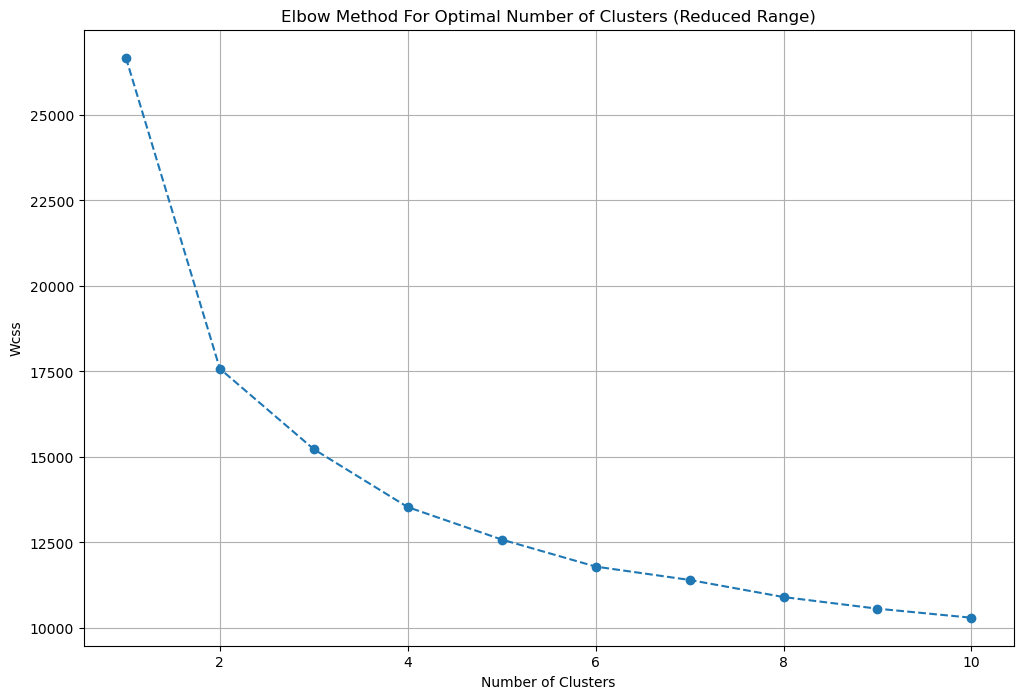

In [92]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.grid(True)
plt.show()

In [93]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = feature_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [94]:
df['luxury_score'] = luxury_score

In [95]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,feature_list,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0,0,"[Lift(s), Park]",8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,New Property,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0,1,1,0,0,0,0,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center]",38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT University', 'Shree Radhey Hospital And Trauma Center', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",[],"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,58141.0,0,0,0,0,0,0,"[Intercom Facility, Lift(s), Park]",15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,not available,17.0,NaN,New Property,"['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global School', 'Anjali nursery', 'Polaris Hospital', 'Axis Bank', 'Triangular Park', 'Flow Sports Life Badminton Club', 'Basai Dhankot Railway Station', 'Cars24', 'Radisson Hotel Gurugram', ""McDonald's"", 'Petrol Pump', 'Indian Post Office']",[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,1000.0,585.0,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,"servant room,others",10.0,North-West,Relatively New,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', 'RPS International School Sector 89', 'DPG Institute of Technology', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Holiday Inn Sector 90', 'De Adventure Park', 'National Tennis Academy Sector 98']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Li

In [96]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'feature_list', 'luxury_score'],
      dtype='object')

In [99]:
# cols to drop
# nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','feature_list','additionalRoom'],inplace=True)

In [100]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3129,flat,godrej,sector 79,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,3.0,NaN,New Property,NaN,NaN,1572.0,1,0,0,0,0,0,104
825,flat,capital residences 360,sector 70a,1.69,8552.0,1976.0,Super Built up area 1976(183.58 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3+,8.0,North-East,New Property,1976.0,1900.0,1650.0,0,1,0,0,0,0,165
3165,house,independent,sector 4,2.30,17014.0,1352.0,Plot area 160(133.78 sq.m.),4,4,3,2.0,East,Old Property,NaN,160.0,NaN,0,0,0,0,0,2,15
1660,flat,m3m woodshire,sector 107,1.35,5717.0,2361.0,Super Built up area 2361(219.34 sq.m.)Built Up area: 1950 sq.ft. (181.16 sq.m.),3,4,3+,8.0,South,Relatively New,2361.0,1950.0,NaN,0,1,0,0,0,2,74
3678,flat,tulip violet,sector 69,2.00,9950.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,0.0,West,Relatively New,2010.0,NaN,NaN,0,0,0,0,0,0,95


In [101]:
df.shape

(3803, 23)

In [102]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)